# Using AnalyzeExpense

Textract AnalyzeExpense is an API dedicated to processing Invoice and Receipts documents. It is available as a synchronous or asynchronous API.

## Installation

To begin, install the amazon-textract-textractor package using pip.

`pip install amazon-textract-textractor`

There are various sets of dependencies available to tailor your installation to your use case. The base package will have sensible default, but you may want to install the PDF extra dependencies if you workflow uses PDFs with pip install amazon-textract-textractor[pdf]. You can read more on extra dependencies in the

In [2]:
from textractor import Textractor

extractor = Textractor(profile_name="default")

document = extractor.analyze_expense(
    file_source="../../../tests/fixtures/invoice.png",
    save_image=True,
)

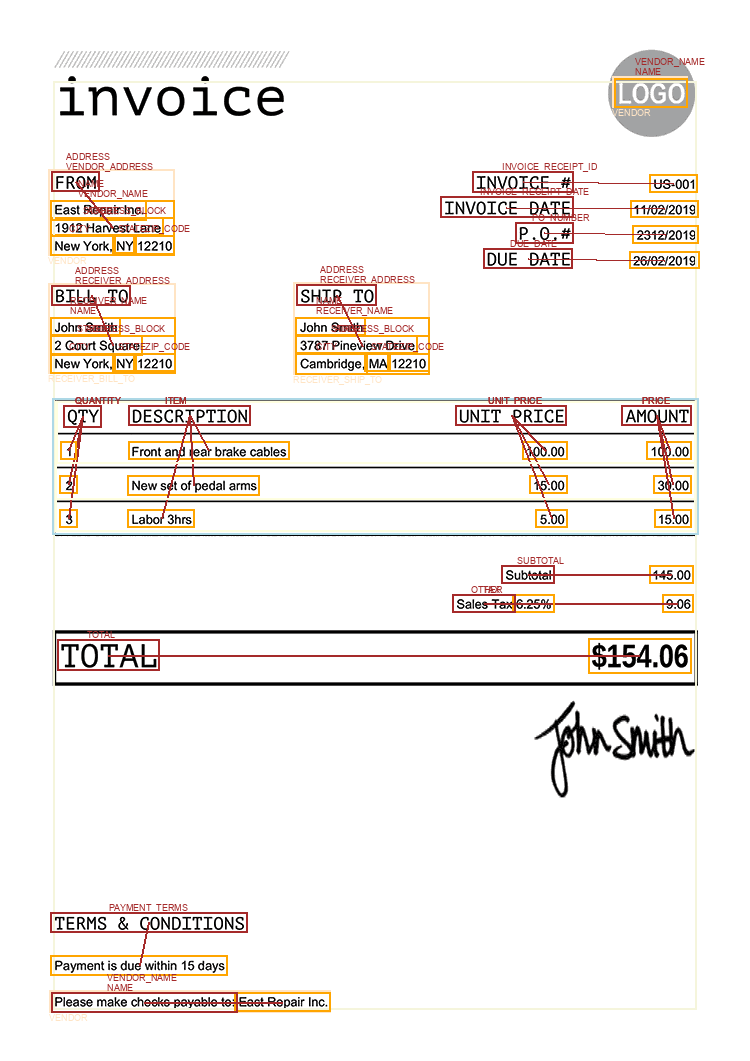

In [4]:
document.visualize(with_words=False)

In [10]:
document

This document holds the following data:
Pages - 1
Words - 98
Lines - 48
Key-values - 0
Checkboxes - 0
Tables - 0
Queries - 0
Signatures - 0
Identity Documents - 0
Expense Documents - 1

## Parsing the output

The AnalyzeExpense API output is captured in the `expense_documents` entity list on the main document. There are two main components that make up an expense document:
- The first one is the summary fields. These are Key Value pairs which are normalized to a list of specific fields. They are different than traditional key values because the key is optional. They also have a normalized type. The full list of which can be found in the API or in the `data.constants` file

In [9]:
from textractor.data.constants import AnalyzeExpenseFields, AnalyzeExpenseFieldsGroup, AnalyzeExpenseLineItemFields

In [12]:
expense_doc = document.expense_documents[0]
expense_doc

Summary fields: 20
Line Item Groups: index 1: 3 rows

In [13]:
expense_doc.summary_fields

ADDRESS:
    ADDRESS (BILL TO): John Smith\n2 Court Square\nNew York, NY 12210
    ADDRESS (SHIP TO): John Smith\n3787 Pineview Drive\nCambridge, MA 12210
    ADDRESS (FROM): East Repair Inc.\n1912 Harvest Lane\nNew York, NY 12210
STREET:
    STREET: 2 Court Square
    STREET: 3787 Pineview Drive
    STREET: 1912 Harvest Lane
CITY:
    CITY: New York,
    CITY: Cambridge,
    CITY: New York,
STATE:
    STATE: NY
    STATE: MA
    STATE: NY
ZIP_CODE:
    ZIP_CODE: 12210
    ZIP_CODE: 12210
    ZIP_CODE: 12210
NAME:
    NAME: John Smith
    NAME: John Smith
    NAME: East Repair Inc.
    NAME (Please make checks payable to:): East Repair Inc.
    NAME: LOGO
ADDRESS_BLOCK:
    ADDRESS_BLOCK: 2 Court Square\nNew York, NY 12210
    ADDRESS_BLOCK: 3787 Pineview Drive\nCambridge, MA 12210
    ADDRESS_BLOCK: 1912 Harvest Lane\nNew York, NY 12210
DUE_DATE:
    DUE_DATE (DUE DATE): 26/02/2019
INVOICE_RECEIPT_DATE:
    INVOICE_RECEIPT_DATE (INVOICE DATE): 11/02/2019
INVOICE_RECEIPT_ID:
    INVOIC

The summary fields are also further grouped in semantic groups. For example, there can be several RECEIVER_ADDRESS, one for shipping and one for billing.
They are accessed in the following property:

In [14]:
expense_doc.summary_groups

RECEIVER_BILL_TO: 
  ADDRESS (BILL TO): John Smith\n2 Court Square\nNew York, NY 12210
  STREET: 2 Court Square
  CITY: New York,
  STATE: NY
  ZIP_CODE: 12210
  NAME: John Smith
  ADDRESS_BLOCK: 2 Court Square\nNew York, NY 12210


RECEIVER_SHIP_TO: 
  ADDRESS (SHIP TO): John Smith\n3787 Pineview Drive\nCambridge, MA 12210
  STREET: 3787 Pineview Drive
  CITY: Cambridge,
  STATE: MA
  ZIP_CODE: 12210
  NAME: John Smith
  ADDRESS_BLOCK: 3787 Pineview Drive\nCambridge, MA 12210


VENDOR: 
  ADDRESS (FROM): East Repair Inc.\n1912 Harvest Lane\nNew York, NY 12210
  STREET: 1912 Harvest Lane
  CITY: New York,
  STATE: NY
  ZIP_CODE: 12210
  NAME: East Repair Inc.
  ADDRESS_BLOCK: 1912 Harvest Lane\nNew York, NY 12210

  NAME (Please make checks payable to:): East Repair Inc.

  NAME: LOGO



- The second main component of the analyze expense output are the line item groups

In [16]:
expense_doc.line_items_groups

[|QUANTITY: 1 | ITEM: Front and rear brake cables | UNIT_PRICE: 100.00 | PRICE: 100.00 | EXPENSE_ROW: 1 Front and rear brake cables 100.00 100.00 | 
 |QUANTITY: 2 | ITEM: New set of pedal arms | UNIT_PRICE: 15.00 | PRICE: 30.00 | EXPENSE_ROW: 2 New set of pedal arms 15.00 30.00 | 
 |QUANTITY: 3 | ITEM: Labor 3hrs | UNIT_PRICE: 5.00 | PRICE: 15.00 | EXPENSE_ROW: 3 Labor 3hrs 5.00 15.00 | ]

In [18]:
expense_doc.line_items_groups[0].to_pandas()

,ITEM,PRICE,PRODUCT_CODE,QUANTITY,UNIT_PRICE
0,Front and rear brake cables,100.00,,1,100.00
1,New set of pedal arms,30.00,,2,15.00
2,Labor 3hrs,15.00,,3,5.00


There are also summary fields that are normalized across these 5 fields.